In [2]:
import numpy as np

import tensorflow as tf

from tensorflow.keras.layers import Input, Dense

from tensorflow.keras.models import Model

from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt

In [3]:
# Load the MNIST dataset

(x_train, _), (x_test, _) = mnist.load_data()

 

# Normalize pixel values to between 0 and 1

x_train = x_train.astype('float32') / 255.

x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))

x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

 

# Flatten the images for the autoencoder

x_train_flat = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))

x_test_flat = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
# Define the autoencoder model

input_img = Input(shape=(784,))

encoded = Dense(128, activation='relu')(input_img)

encoded = Dense(64, activation='relu')(encoded)

encoded = Dense(32, activation='relu')(encoded)

 

decoded = Dense(64, activation='relu')(encoded)

decoded = Dense(128, activation='relu')(decoded)

decoded = Dense(784, activation='sigmoid')(decoded)

 

autoencoder = Model(input_img, decoded)

In [5]:
# Compile the model

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [6]:
# Train the autoencoder

autoencoder.fit(x_train_flat, x_train_flat,

                epochs=50,

                batch_size=256,

                shuffle=True,

                validation_data=(x_test_flat, x_test_flat))



Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3433 - val_loss: 0.1680
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1588 - val_loss: 0.1365
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1343 - val_loss: 0.1239
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1233 - val_loss: 0.1167
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1160 - val_loss: 0.1105
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1105 - val_loss: 0.1064
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1068 - val_loss: 0.1041
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1048 - val_loss: 0.1022
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1029 - val_loss: 0.1005
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1009 - val_loss: 0.0992
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0998 - val_loss: 0.0976
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

In [7]:
# Encode and decode some digits

encoded_imgs = autoencoder.predict(x_test_flat)

decoded_imgs = autoencoder.predict(x_test_flat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step


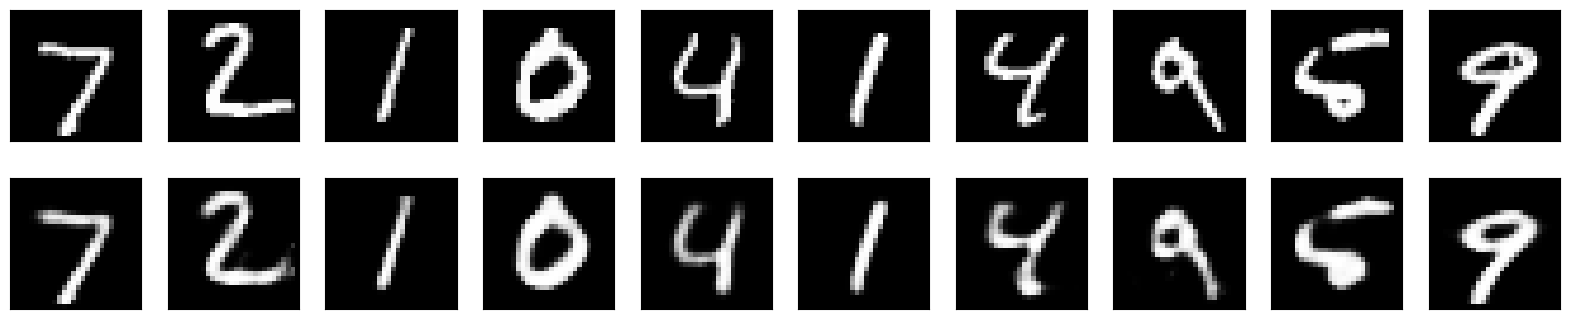

In [8]:
# Display the original and reconstructed images

n = 10

plt.figure(figsize=(20, 4))

for i in range(n):

    # Display original

    ax = plt.subplot(2, n, i + 1)

    plt.imshow(x_test_flat[i].reshape(28, 28))

    plt.gray()

    ax.get_xaxis().set_visible(False)

    ax.get_yaxis().set_visible(False)

 

    # Display reconstruction

    ax = plt.subplot(2, n, i + 1 + n)

    plt.imshow(decoded_imgs[i].reshape(28, 28))

    plt.gray()

    ax.get_xaxis().set_visible(False)

    ax.get_yaxis().set_visible(False)

plt.show()